# Relationship between Sleep Health and Lifestyle
Understanding the relationship between lifestyle choices and analyzing various factors to gain insights into the causes and effects of sleep on quality of life.
DataSet: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score

# Loading and exploring the dataset, visualizing the lifestyle features and sleep assets

In [2]:
data=pd.read_csv(r"F:\Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
print("The shape of the dataframe is:",data.shape)
print("The size of the dataframe is:",data.size)

The shape of the dataframe is: (374, 13)
The size of the dataframe is: 4862


In [4]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


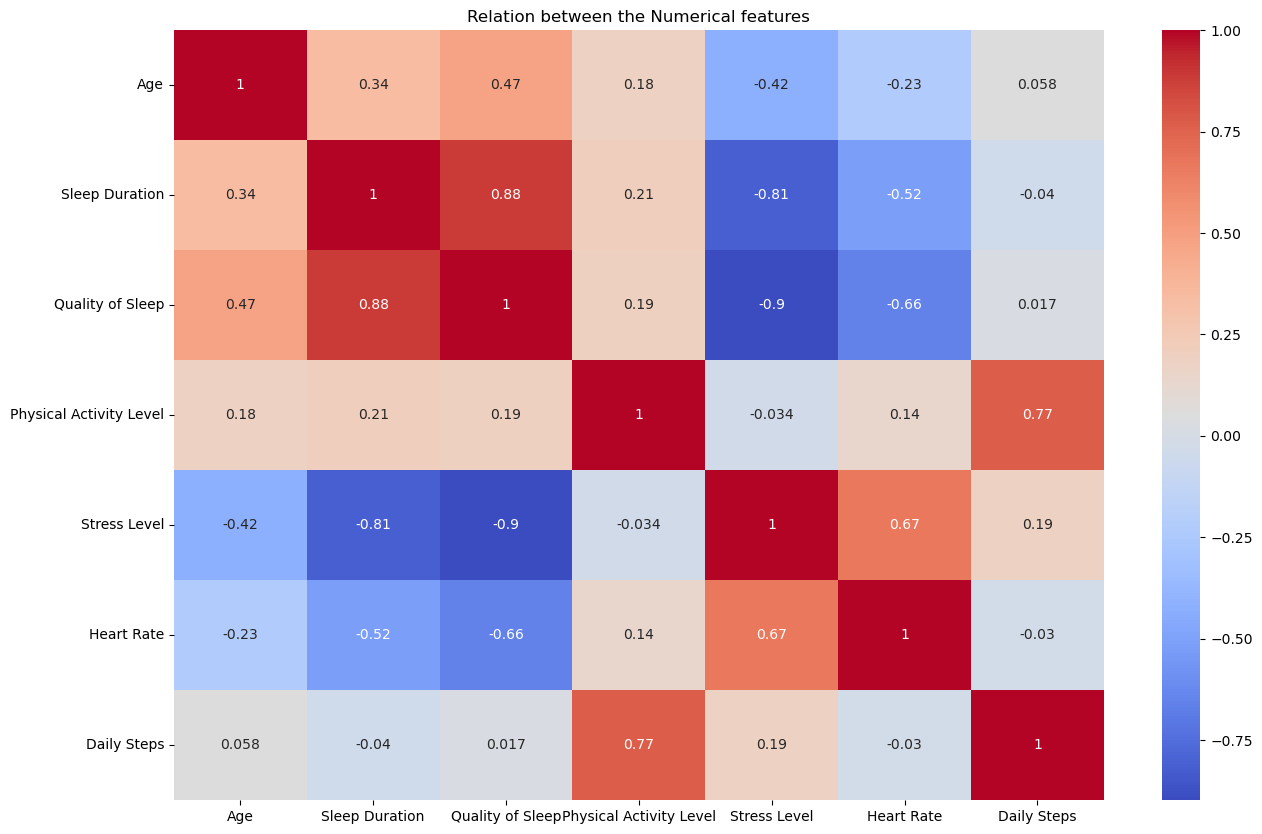

In [5]:
#CORELATIONAL MATRIX
corr_matrix = data.corr()
corr_matrix = corr_matrix.drop('Person ID', axis=1)
corr_matrix = corr_matrix.drop('Person ID', axis=0)
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Relation between the Numerical features')
plt.show()

In [6]:
SA = data[data['Sleep Disorder'] == 'Sleep Apnea'].shape[0]
non = data[data['Sleep Disorder'] == 'None'].shape[0]
Ins = data[data['Sleep Disorder'] == 'Insomnia'].shape[0]
# Print the counts
print("Number of Person having no Sleep Disorder:", non)
print("Number of Persons suffering from Sleep Apnea:", SA)
print("Number of Insomniac Persons:", Ins)

Number of Person having no Sleep Disorder: 219
Number of Persons suffering from Sleep Apnea: 78
Number of Insomniac Persons: 77


In [7]:
# Average heart rate for individuals with different sleep disorders?
ahr = data.groupby('Sleep Disorder')['Heart Rate'].mean().reset_index()
ahr

,Sleep Disorder,Heart Rate
0,Insomnia,70.467532
1,None,69.018265
2,Sleep Apnea,73.089744


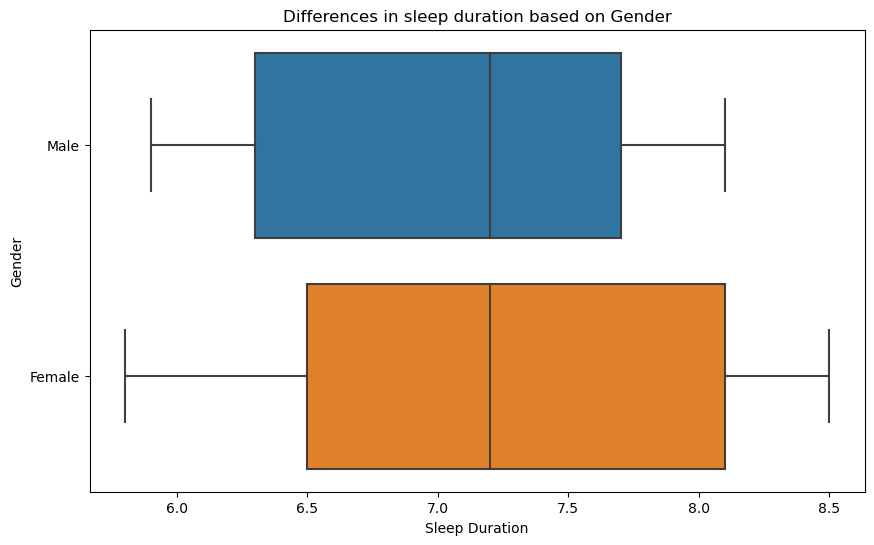

In [8]:
# Box plot to visualize the differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Gender', x='Sleep Duration')
plt.title('Differences in sleep duration based on Gender')
plt.ylabel('Gender')
plt.xlabel('Sleep Duration')
plt.show()

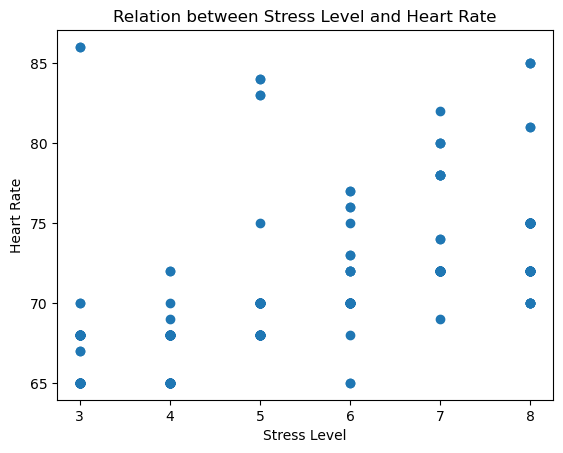

In [9]:
# Scatter plot to visualize the Effect of Stress Level on Heart Rate

plt.scatter(data['Stress Level'], data['Heart Rate'])
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate')
plt.title('Relation between Stress Level and Heart Rate')

plt.show()

# Preprocessing the data and performing feature scaling

In [10]:
#Checking there are no Missing Values
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [11]:
# Check for duplicates
duplicates = data.duplicated()
duplicates = duplicates.sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [12]:
# Performing one-hot encoding [to encode categorical variables]
dataen = pd.get_dummies(data, columns=['Gender','BMI Category','Blood Pressure'])
dataen

,Person ID,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,27,Software Engineer,6.1,6,42,6,77,4200,None,...,0,0,0,0,0,0,0,0,0,0
1,2,28,Doctor,6.2,6,60,8,75,10000,None,...,0,0,0,0,0,0,0,0,0,0
2,3,28,Doctor,6.2,6,60,8,75,10000,None,...,0,0,0,0,0,0,0,0,0,0
3,4,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,...,0,0,0,0,0,0,0,1,0,0
4,5,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,...,0,0,0,0,0,0,0,0,1,0
370,371,59,Nurse,8.0,9,75,3,68,7000,Sleep Apnea,...,0,0,0,0,0,0,0,0,1,0
371,372,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,...,0,0,0,0,0,0,0,0,1,0
372,373,59,Nurse,8.1,9,75,3,68,7000,Sleep Apnea,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# dropping unnecessary features
data = dataen.drop("BMI Category_Normal Weight", axis=1)
data = dataen.drop("Person ID", axis=1)
data = dataen.drop("Occupation", axis=1)
data

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,27,6.1,6,42,6,77,4200,None,0,...,0,0,0,0,0,0,0,0,0,0
1,2,28,6.2,6,60,8,75,10000,None,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,75,10000,None,0,...,0,0,0,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,85,3000,Sleep Apnea,0,...,0,0,0,0,0,0,0,1,0,0
4,5,28,5.9,4,30,8,85,3000,Sleep Apnea,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000,Sleep Apnea,1,...,0,0,0,0,0,0,0,0,1,0
370,371,59,8.0,9,75,3,68,7000,Sleep Apnea,1,...,0,0,0,0,0,0,0,0,1,0
371,372,59,8.1,9,75,3,68,7000,Sleep Apnea,1,...,0,0,0,0,0,0,0,0,1,0
372,373,59,8.1,9,75,3,68,7000,Sleep Apnea,1,...,0,0,0,0,0,0,0,0,1,0


In [14]:
# Define the custom mapping dictionary
mapping = {'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}

# Apply the custom mapping to the 'Outcome' column
data['Sleep Disorder'] = data['Sleep Disorder'].map(mapping)
data

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,27,6.1,6,42,6,77,4200,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,68,7000,1,1,...,0,0,0,0,0,0,0,0,1,0
370,371,59,8.0,9,75,3,68,7000,1,1,...,0,0,0,0,0,0,0,0,1,0
371,372,59,8.1,9,75,3,68,7000,1,1,...,0,0,0,0,0,0,0,0,1,0
372,373,59,8.1,9,75,3,68,7000,1,1,...,0,0,0,0,0,0,0,0,1,0


# Splitting the dataset into training and testing sets

In [15]:
X=data.drop('Sleep Disorder',axis=1)
y = data['Sleep Disorder']
y = np.array(y).reshape(-1, 1)

In [16]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [17]:
#spliting X and y
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3, random_state=42, stratify=None)

# Model Building

In [18]:
# Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, Y_train)

# Predict on the testing data
y_pred = linear_reg.predict(X_test)


# Evaluating the model's performance

In [19]:
# mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# R-squared
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.24041377899726823
R-squared: 0.7598414729789199


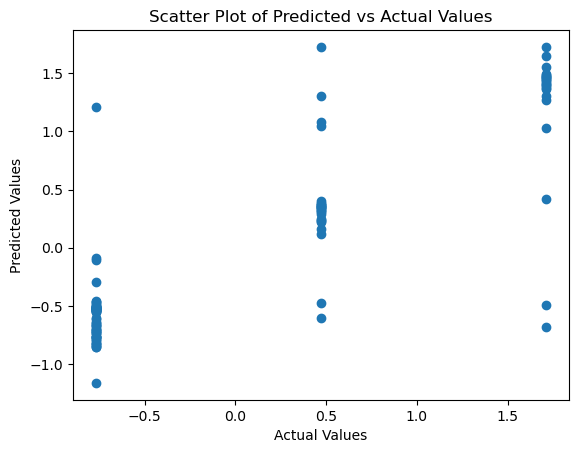

In [21]:
# Create the scatter plot
plt.scatter(Y_test,y_pred)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')

# Display the plot
plt.show()